In [32]:
library(singscore)
library(tidyverse)
library(ggplot2)

In [33]:
# Set random seed so this part is reproducible
# https://www.random.org/ 2023-08-09
set.seed(3866) 

In [34]:
test_minmax <- read.table("../../../../data/expression/processed/response-subtype-test/V4//IO-Atlas-NSCLC-NSCLC-Response-Cluster-0-TPM-MinMaxNorm-TEST-2023-08-10-V4.tsv", 
                          sep='\t', 
                          row.names=1, 
                          header=T)

test_label <- read.table("../../../../data/expression/processed/response-subtype-test/V4/IO-Atlas-NSCLC-NSCLC-Response-Cluster-0-LABEL-TEST-2023-08-10-V4.tsv", 
                         sep='\t', 
                         row.names=1, 
                         header=F)

In [35]:
test_label

,V2
,<int>
SU2CLC-DFC-1002-T1,0
SU2CLC-DFC-DF0840-T1,0
SU2CLC-DFC-DF0033-T1,0
SU2CLC-MGH-1488-T1,1
SU2CLC-MGH-1575-T1,0
SU2CLC-CLE-NIVO18-T1,0
SU2CLC-COL-1021-T1,0
SU2CLC-MDA-1630-T1,0
SU2CLC-MGH-1501-T1,0


In [36]:
gs <- read.table("../../../../data/gs/IO-Atlas-NSCLC-NSCLC-Response-Cluster-0-TPM-MinMaxNorm-TRAIN-2023-08-10-V4-gene-sets.tsv",
                 sep='\t', 
                 header=T)

In [37]:
unique(gs$gs)

[1] "ratio-cluster-0" "ratio-cluster-1"

In [38]:
cluster0_up <- gs %>% filter((gs == "ratio-cluster-0") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster0_dwn <- gs %>% filter((gs == "ratio-cluster-0") & (direction == "down")) %>% pull("gene") %>% unique()

cluster1_up <- gs %>% filter((gs == "ratio-cluster-1") & (direction == "up")) %>%  pull("gene") %>% unique()
cluster1_dwn <- gs %>% filter((gs == "ratio-cluster-1") & (direction == "down")) %>% pull("gene") %>% unique()

#cluster2_up <- gs %>% filter((gs == "ratio-cluster2") & (direction == "up")) %>%  pull("gene") %>% unique()
#cluster2_dwn <- gs %>% filter((gs == "ratio-cluster2") & (direction == "down")) %>% pull("gene") %>% unique()

#cluster3_up <- gs %>% filter((gs == "ratio-cluster3") & (direction == "up")) %>%  pull("gene") %>% unique()
#cluster3_dwn <- gs %>% filter((gs == "ratio-cluster3") & (direction == "down")) %>% pull("gene") %>% unique()

#cluster4_up <- gs %>% filter((gs == "ratio-cluster4") & (direction == "up")) %>%  pull("gene") %>% unique()
#cluster4_dwn <- gs %>% filter((gs == "ratio-cluster4") & (direction == "down")) %>% pull("gene") %>% unique()

In [39]:
rnk <- rankGenes(test_minmax)

In [40]:
cluster0score <- simpleScore(rnk, upSet = cluster0_up, downSet = cluster0_dwn)
cluster1score <- simpleScore(rnk, upSet = cluster1_up, downSet = cluster1_dwn)
#cluster2score <- simpleScore(rnk, upSet = cluster2_up, downSet = cluster2_dwn)
#cluster3score <- simpleScore(rnk, upSet = cluster3_up, downSet = cluster3_dwn)
#cluster4score <- simpleScore(rnk, upSet = cluster4_up, downSet = cluster4_dwn)

cluster0score["response"] <- test_label
cluster1score["response"] <- test_label
#cluster2score["response"] <- test_label
#cluster3score["response"] <- test_label
#cluster4score["response"] <- test_label

In [41]:
cluster0score

,TotalScore,TotalDispersion,UpScore,UpDispersion,DownScore,DownDispersion,response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SU2CLC.DFC.1002.T1,0.62036983,2741.698,0.16219124,4330.675,0.458178589,1152.7215,0
SU2CLC.DFC.DF0840.T1,-0.56439009,3258.014,-0.16399179,4180.932,-0.400398299,2335.0950,0
SU2CLC.DFC.DF0033.T1,-0.06791283,8362.235,-0.07676691,3195.003,0.008854083,13529.4663,0
SU2CLC.MGH.1488.T1,0.77751924,229.803,0.27749232,459.606,0.500026912,0.0000,1
SU2CLC.MGH.1575.T1,-0.27887382,2581.577,-0.11823546,4412.218,-0.160638355,750.9369,0
SU2CLC.CLE.NIVO18.T1,-0.06304604,10042.762,-0.07922021,6757.691,0.016174175,13327.8327,0
SU2CLC.COL.1021.T1,0.61847796,2917.015,0.11845105,5834.031,0.500026912,0.0000,0
SU2CLC.MDA.1630.T1,0.04848849,9258.837,0.03470950,5123.866,0.013778998,13393.8084,0
SU2CLC.MGH.1501.T1,-0.01082741,5354.781,-0.20279145,6206.164,0.191964045,4503.3975,0


In [42]:
t.test(cluster0score %>% filter(response==1) %>% pull("TotalScore"), cluster0score %>% filter(response==0) %>% pull("TotalScore"))


	Welch Two Sample t-test

data:  cluster0score %>% filter(response == 1) %>% pull("TotalScore") and cluster0score %>% filter(response == 0) %>% pull("TotalScore")
t = 6.0457, df = 10.1, p-value = 0.0001193
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4234501 0.9167005
sample estimates:
mean of x mean of y 
0.7854121 0.1153368 


In [43]:
t.test(cluster1score %>% filter(response==1) %>% pull("TotalScore"), cluster1score %>% filter(response==0) %>% pull("TotalScore"))


	Welch Two Sample t-test

data:  cluster1score %>% filter(response == 1) %>% pull("TotalScore") and cluster1score %>% filter(response == 0) %>% pull("TotalScore")
t = 7.7354, df = 10.107, p-value = 1.484e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3013353 0.5446735
sample estimates:
  mean of x   mean of y 
 0.34572443 -0.07727996 


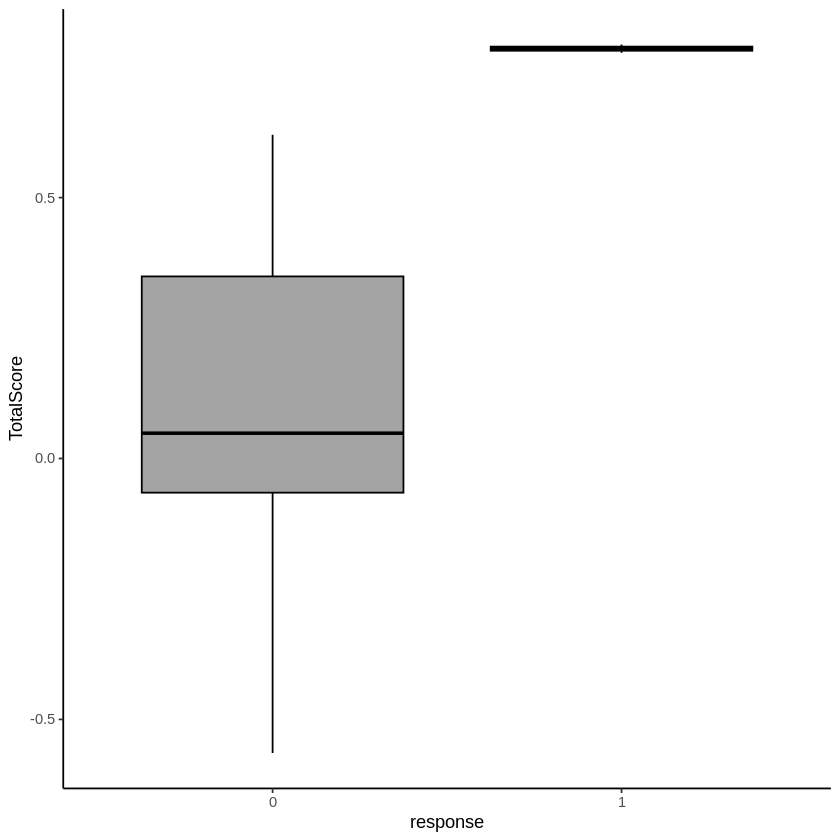

In [44]:
p<-ggplot(cluster0score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p

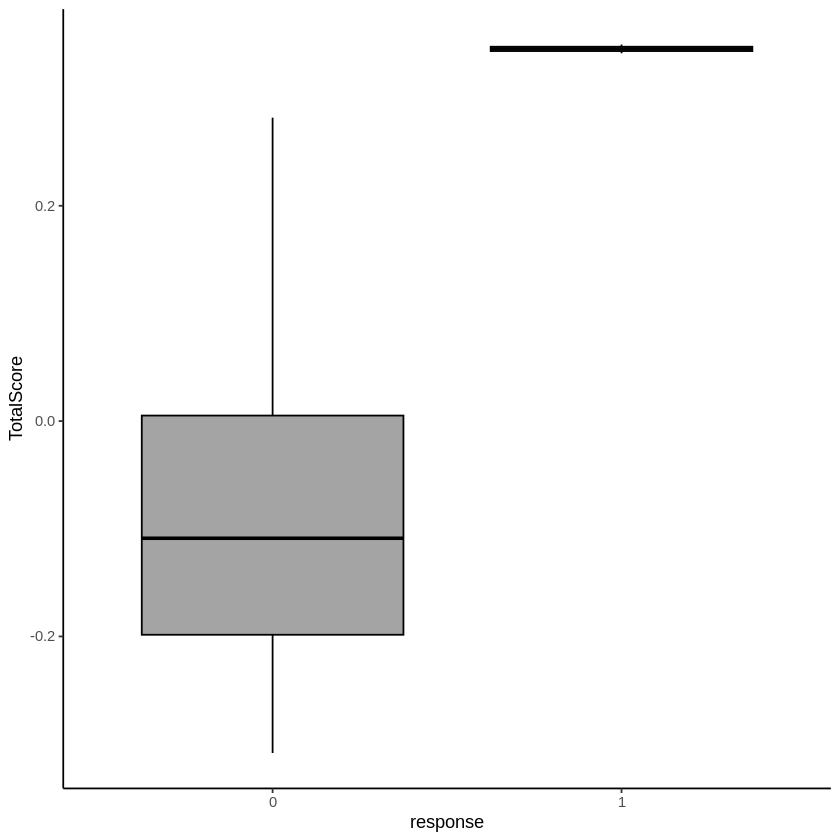

In [45]:
p<-ggplot(cluster1score %>% mutate(response=as.character(response)), aes(x=response, y=TotalScore, color=response)) +
  geom_boxplot(fill='#A4A4A4', color="black")+
  theme_classic()
p